## COSC311 Lab2

In [19]:
import pandas as pd # our main priority here
import numpy as np  # just in case, but also comes along with pandas
from matplotlib import pyplot as plt # for plotting

### Task1
- use info() to show column information for each dataset
- use describe() to show statistics for each dataset
- Show unique values in Ws (wind speed) for each dataset
- Count how many sample are in each dataset

In [20]:
bejaia_data = pd.read_csv('Bejaia_Region.csv')
sidi_data = pd.read_csv('Sidi-Bel_Abbes_Region.csv')

print('Bejaia Region Info\n',bejaia_data.info())
print('\nSidi-Bel Abbes Region Info\n', sidi_data.info())
print('\nBejaia Region Data\n', bejaia_data.describe())
print('\nSidi-Bel Abbes Region Data\n', sidi_data.describe())
print('\nBejaia Unique Windspeed\n', bejaia_data['Ws'].unique())
print('\nSidi-Bel Abbes Unique Windspeed\n', sidi_data['Ws'].unique())
print('\nBejaia Count\n', bejaia_data.count())
print('\nSidi-Bel Abbes Count\n', sidi_data.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB
Bejaia Region Info
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Cou

### Task2
- Draw a line figure to show the temperature change with time for the Bejaia Region Dataset

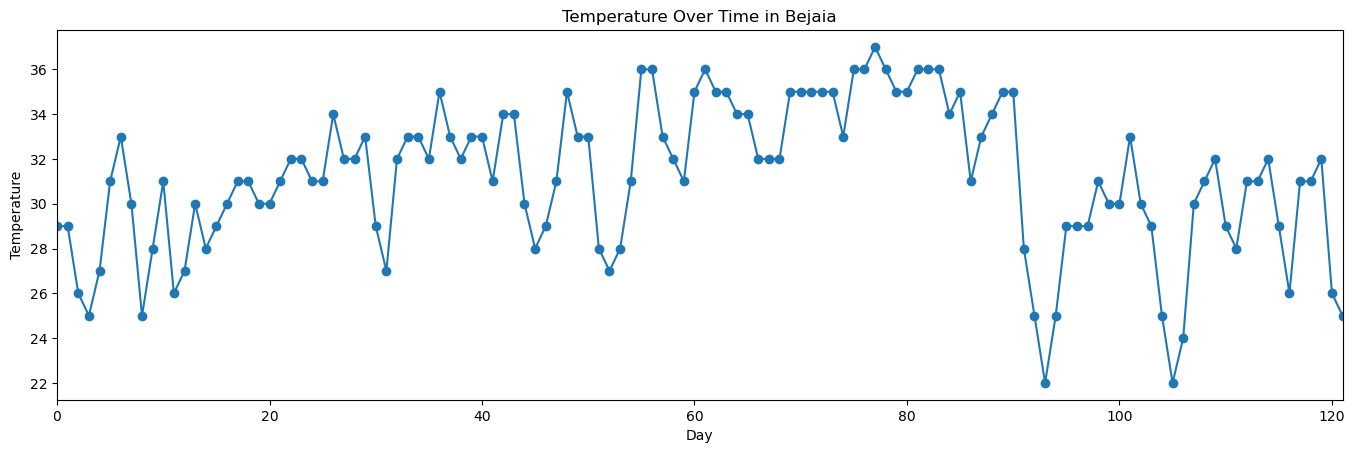

In [21]:
plt.plot(bejaia_data['Temperature'], marker='o', linestyle='solid')
plt.title('Temperature Over Time in Bejaia')
plt.ylabel('Temperature')
plt.xlabel('Day')
N=50
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.show()

### Task3
- Draw a scatterplot figure to show the realtionship between tempurature and fire weather index (FWI) for the Sidi-Bel Abbes Region Dataset

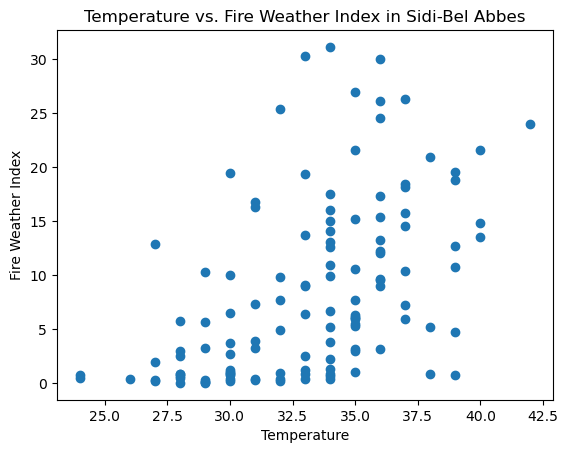

In [22]:
plt.scatter(sidi_data['Temperature'], sidi_data['FWI'])
plt.title('Temperature vs. Fire Weather Index in Sidi-Bel Abbes')
plt.xlabel('Temperature')
plt.ylabel('Fire Weather Index')
plt.show()

### Task4
- Draw a histogram to show the average relative humidity (RH) for each month for the Bejaia Region Dataset

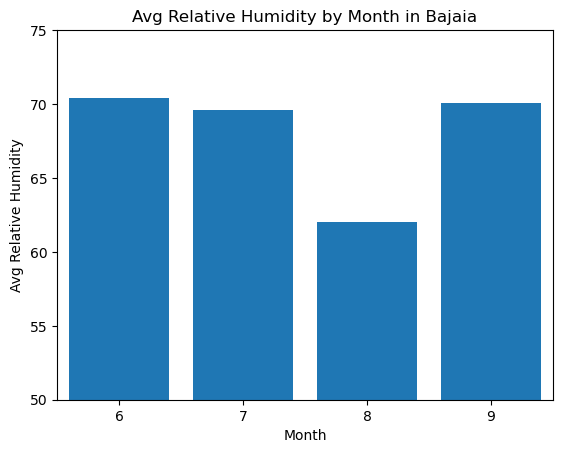

In [23]:
rh = bejaia_data['RH'].groupby(bejaia_data['month']).apply(lambda x: x.values.tolist()).to_dict()
rh_avg = {key: sum(rh[key])/len(rh[key]) for key in rh.keys()}
plt.bar(rh_avg.keys(), rh_avg.values())
plt.xlabel('Month')
plt.ylabel('Avg Relative Humidity')
plt.axis([5.5,9.5,50,75])
plt.xticks([i for i in range(6,10)])
plt.title('Avg Relative Humidity by Month in Bajaia')
plt.show()

### Task5
- Draw a bar figure to show the maximum Rain amount in a day for each month for the Bejaia Region Dataset

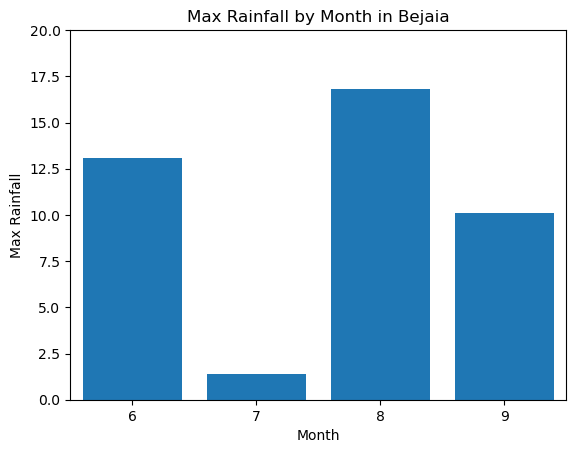

In [24]:
rain = bejaia_data['Rain'].groupby(bejaia_data['month']).apply(lambda x: x.values.tolist()).to_dict()
max_rain = {key: max(rain[key]) for key in rain.keys()}
plt.bar(max_rain.keys(), max_rain.values())
plt.xlabel('Month')
plt.ylabel('Max Rainfall')
plt.axis([5.5,9.5,0, 20])
plt.xticks([i for i in range(6,10)])
plt.title('Max Rainfall by Month in Bejaia')
plt.show()


### Task6
- Draw a histogram to show the wind speed (Ws) distribution in 5 bins for the Sidi-Bel Abbes Region Dataset in June, 2012

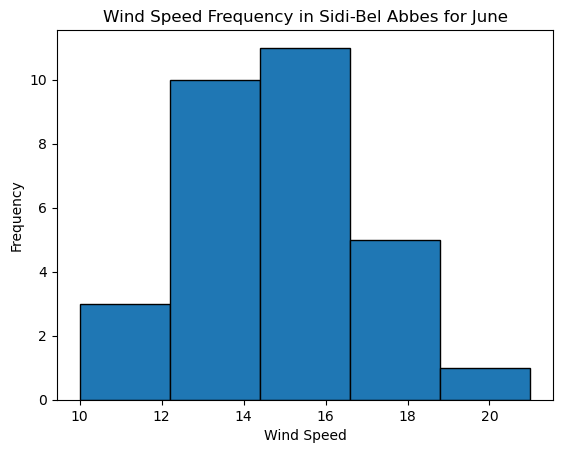

In [25]:
sidi_june = sidi_data[(sidi_data['month'] == 6)]
plt.hist(sidi_june['Ws'], bins=5, edgecolor=(0,0,0))
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Frequency in Sidi-Bel Abbes for June')
plt.show()

### Task7
- draw a line figure to show the correlation between temperature and relative humidity for the Sidi-Bel Abbes Region Dataset in July, 2012

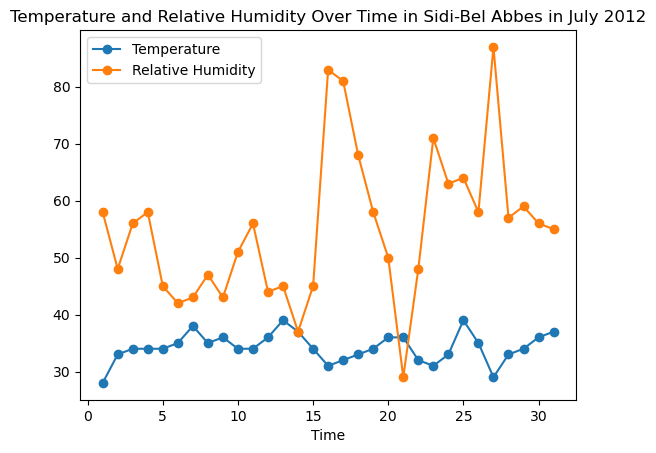

In [26]:
sidi_july = sidi_data[(sidi_data['month'] == 7)]
plt.plot(sidi_july['day'], sidi_july['Temperature'], marker='o', label='Temperature')
plt.plot(sidi_july['day'], sidi_july['RH'], marker='o', label='Relative Humidity')
plt.legend()
plt.xlabel('Time')
plt.title('Temperature and Relative Humidity Over Time in Sidi-Bel Abbes in July 2012')
plt.show()


### Task8
- Draw a bar figure to show the distribution of realtive humidity for the Bejaia Region Dataset
- The x-axis is the decile of relative humidity
- The y-axis is the number of days

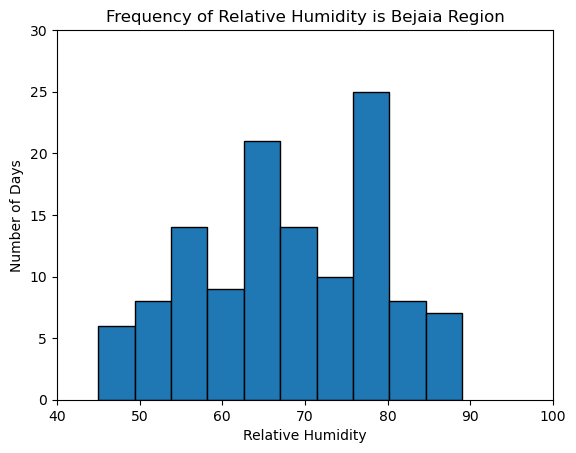

In [27]:
plt.hist(bejaia_data['RH'], edgecolor=(0,0,0))
plt.axis([40,100, 0, 30])
plt.xlabel('Relative Humidity')
plt.ylabel('Number of Days')
plt.title('Frequency of Relative Humidity is Bejaia Region')
plt.show()

### Task9
- Draw a figure to show the avg temperature for each month when there is no fire and there is fire for the Bejaia Region Dataset
- Bar graph with 2 colors for fire and no fire
- x-axis is the month
- y-axis is the avg temp

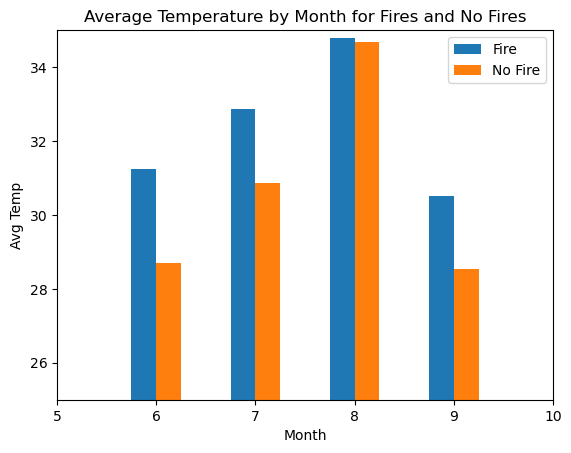

In [28]:
temp = bejaia_data[['Temperature', 'month', 'Classes']]
temp_fire = temp[temp['Classes'] == 'fire   '].groupby(['month'], as_index=False).mean()
temp_no_fire = temp[temp['Classes'] == 'not fire   '].groupby(['month'], as_index=False).mean()
plt.bar(temp_fire['month']-0.125, temp_fire['Temperature'], 0.25, label='Fire')
plt.bar(temp_no_fire['month']+0.125, temp_no_fire['Temperature'], 0.25, label='No Fire')
plt.axis([5, 10, 25, 35])
plt.legend()
plt.xlabel('Month')
plt.ylabel('Avg Temp')
plt.title('Average Temperature by Month for Fires and No Fires')
plt.show()